In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
from sklearn import linear_model
from sklearn import metrics

In [2]:
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## ВАХ (полностью)

In [3]:
up_va = pd.read_csv('up_VA.csv', encoding='utf-8')

In [4]:
x_open = 92.7
x = up_va.U_u[lambda df : df > x_open]

In [5]:
y = up_va.I_u[x.index]
print x
print y

4      94.0
5      96.2
6      98.3
7     100.6
8     102.0
9     104.5
10    105.9
11    107.8
12    112.0
Name: U_u, dtype: float64
4     4.41
5     4.82
6     5.25
7     5.70
8     5.96
9     6.46
10    6.72
11    7.07
12    7.88
Name: I_u, dtype: float64


In [6]:
regressor = linear_model.LinearRegression(fit_intercept=True) # Нельзя делать FixIntercept. Будет плохо
n = len(x)

In [7]:
regressor.fit(x.values.reshape(n, 1), y.values.reshape(n, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regressor.coef_

array([[ 0.19321806]])

In [9]:
down_va = pd.read_csv('down_VA.csv', encoding='utf-8')

In [10]:
x_close = 75
x_d = down_va.U_d
y_d = down_va.I_d

regressor_d = linear_model.LinearRegression(fit_intercept=True)
n_d = len(x_d)
regressor.fit(x_d.values.reshape(n_d, 1), y_d.values.reshape(n_d, 1))
regressor.coef_


array([[ 0.19293817]])

In [11]:
r_pad = 5.1
up_va['u_u'] = up_va.I_u.apply(lambda x: x*r_pad)

In [12]:
up_va['U-u_u'] = up_va.U_u - up_va.u_u

In [13]:
r_pad = 5.1
down_va['u_d'] = down_va.I_d.apply(lambda x: x*r_pad)
down_va['U-u_d'] = down_va.U_d - down_va.u_d

In [14]:
df_res = pd.concat([up_va, down_va], axis=1)
regressor_res = linear_model.LinearRegression(fit_intercept=True)
x_r = pd.concat([df_res["U-u_u"], df_res["U-u_d"]]).dropna()
n_r = len(x_r)
y_r = pd.concat([df_res["I_u"], df_res["I_d"]]).dropna()
regressor_res.fit(x_r.values.reshape(n_r, 1), y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 71.          71.04107143  71.08214286  71.12321429  71.16428571
  71.20535714  71.24642857  71.2875      71.32857143  71.36964286
  71.41071429  71.45178571  71.49285714  71.53392857  71.575       71.61607143
  71.65714286  71.69821429  71.73928571  71.78035714  71.82142857  71.8625
  71.90357143  71.94464286  71.98571429  72.02678571  72.06785714
  72.10892857  72.15      ]
[ 0.73152879  1.03115112  1.33077345  1.63039578  1.93001812  2.22964045
  2.52926278  2.82888512  3.12850745  3.42812978  3.72775211  4.02737445
  4.32699678  4.62661911  4.92624145  5.22586378  5.52548611  5.82510844
  6.12473078  6.42435311  6.72397544  7.02359778  7.32322011  7.62284244
  7.92246478  8.22208711  8.52170944  8.82133177  9.12095411]


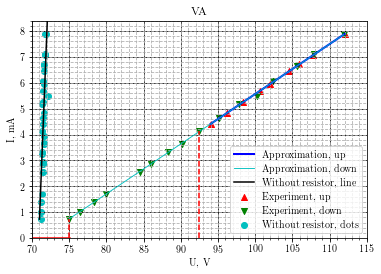

In [15]:
f = plt.subplot()
#UP
f.scatter(x, y, c='r', marker='^', label='Experiment, up')
x_pred = np.linspace(np.min(x), np.max(x), n)
y_pred = regressor.predict(x_pred.reshape(n, 1))
f.plot(x_pred, y_pred, c='b', linewidth=2, label='Approximation, up')
#DOWN
f.scatter(x_d, y_d, c='g', marker='v', label='Experiment, down')
x_d_pred = np.linspace(np.min(x_d), np.max(x_d), n_d)
y_d_pred = regressor.predict(x_d_pred.reshape(n_d, 1))
f.plot(x_d_pred, y_d_pred, c='c', linewidth=0.9,  label='Approximation, down')
# TURN LAMP ON AND OFF
f.plot([70, 75], [0, 0], color='r', linewidth=2.5)
f.plot([75, 75], [0, np.min(y_d)], color='r', linestyle='--')
f.plot([92.5, 92.5], [0, regressor.predict(np.array([92.5]).reshape(1, 1))], color='r', linestyle='--')
# WITHOUT RESISTOR
f.scatter(x_r, y_r, c='c', label='Without resistor, dots')
x_r_pred = np.linspace(71, np.max(x_r), n_r)
y_r_pred = regressor_res.predict(x_r_pred.reshape(n_r, 1))
print x_r_pred
print y_r_pred
f.plot(x_r_pred, y_r_pred, c='k', label="Without resistor, line")

f.set_xlabel(r'U, V')
f.set_ylabel(r'I, mA')

maj_loc = MultipleLocator(1)
min_loc = MultipleLocator(0.2)

f.set_xlim((70, 115))
f.set_ylim((0, 8.4))
f.xaxis.set_major_locator(MultipleLocator(5))
f.xaxis.set_minor_locator(MultipleLocator(1))
f.yaxis.set_major_locator(maj_loc)
f.yaxis.set_minor_locator(min_loc)

f.grid(True, which='minor', linestyle='--')
f.grid(True, which='major', c='black', linestyle='-', alpha=1)
plt.title(r'VA')
plt.legend()

plt.savefig('va.pdf', fmt='pdf')
plt.show()

### 3-й эксперимент

In [16]:
rc_exp = pd.read_csv('rc_exp.csv', encoding='utf-8')

In [17]:
V1 = 92.5
V2 = 75

In [18]:
rc_exp

,Unnamed: 0,R,C,f,U
0,0,525.0,0.005,58.4,112.6
1,1,650.0,0.005,39.7,112.6
2,2,775.0,0.005,30.4,112.6
3,3,900.0,0.005,25.2,112.6
4,4,500.0,0.050,4.8,112.6
5,5,500.0,0.040,6.0,112.6
6,6,500.0,0.030,8.0,112.6
7,7,500.0,0.020,12.7,112.6
8,8,500.0,0.010,29.5,112.6
9,9,500.0,0.005,68.4,112.6


#### Пляски от C

In [19]:
# Теоретические значение T
rc_exp['T_C_t'] = (rc_exp.R*(10**3)) * np.log((rc_exp.U - V2)/(rc_exp.U - V1)) * (rc_exp.C*(10**(-6)))

In [20]:
# ПОДГОН! Похоже, мы потеряли порядок в частотах
rc_exp['f'] = 10*rc_exp.f
rc_exp['T_C_e'] = 1/rc_exp.f

In [21]:
rc_exp

,Unnamed: 0,R,C,f,U,T_C_t,T_C_e
0,0,525.0,0.005,584.0,112.6,0.001644,0.001712
1,1,650.0,0.005,397.0,112.6,0.002035,0.002519
2,2,775.0,0.005,304.0,112.6,0.002427,0.003289
3,3,900.0,0.005,252.0,112.6,0.002818,0.003968
4,4,500.0,0.050,48.0,112.6,0.015657,0.020833
5,5,500.0,0.040,60.0,112.6,0.012526,0.016667
6,6,500.0,0.030,80.0,112.6,0.009394,0.012500
7,7,500.0,0.020,127.0,112.6,0.006263,0.007874
8,8,500.0,0.010,295.0,112.6,0.003131,0.003390
9,9,500.0,0.005,684.0,112.6,0.001566,0.001462


In [22]:
X_C = rc_exp['C'][rc_exp.R == 500]

In [23]:
T_C_t = rc_exp['T_C_t'][rc_exp.R == 500]
T_C_e = rc_exp['T_C_e'][rc_exp.R == 500]

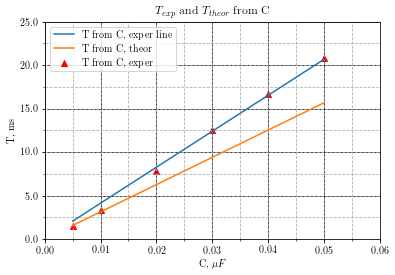

In [24]:
f = plt.subplot()
# Экспериментальные точки
f.scatter(X_C, T_C_e, label='T from C, exper', c='r', marker='^')
# Линейная регрессия
regressor_C = linear_model.LinearRegression(fit_intercept=False)
regressor_C.fit(X_C.values.reshape(-1, 1), T_C_e)
T_C_pred = regressor_C.predict(X_C.values.reshape(-1, 1))

f.plot(X_C, T_C_pred, label='T from C, exper line')
f.plot(X_C, T_C_t , label='T from C, theor')
f.set_title(r"$T_\text{exp}$ and $T_\text{theor}$ from C")
f.set_xlabel(r'C, $\mu F$')
f.set_ylabel(r'T, ms')

f.grid(True, which='major', c='black')
f.grid(True, which='minor', linestyle='--')
f.set_xlim((0, 0.06))
f.set_ylim((0, 0.025))
f.xaxis.set_minor_locator(MultipleLocator(0.005))
f.yaxis.set_minor_locator(MultipleLocator(0.0025))
# Вынесем порядок на улицу
f.yaxis.set_major_formatter(FuncFormatter(lambda v, tick: '$%1.1f$' % (v*1e3)))

f.legend()
plt.savefig('3rd.pdf', fmt='pdf')
plt.show()

#### Пляски от R

In [25]:
# Теоретические значение T
rc_exp['T_R_t'] = (rc_exp.R*(10**3)) * np.log((rc_exp.U - V2)/(rc_exp.U - V1)) * (rc_exp.C*(10**(-6)))

In [26]:
rc_exp['T_R_e'] = 1/rc_exp.f

In [27]:
rc_exp

,Unnamed: 0,R,C,f,U,T_C_t,T_C_e,T_R_t,T_R_e
0,0,525.0,0.005,584.0,112.6,0.001644,0.001712,0.001644,0.001712
1,1,650.0,0.005,397.0,112.6,0.002035,0.002519,0.002035,0.002519
2,2,775.0,0.005,304.0,112.6,0.002427,0.003289,0.002427,0.003289
3,3,900.0,0.005,252.0,112.6,0.002818,0.003968,0.002818,0.003968
4,4,500.0,0.050,48.0,112.6,0.015657,0.020833,0.015657,0.020833
5,5,500.0,0.040,60.0,112.6,0.012526,0.016667,0.012526,0.016667
6,6,500.0,0.030,80.0,112.6,0.009394,0.012500,0.009394,0.012500
7,7,500.0,0.020,127.0,112.6,0.006263,0.007874,0.006263,0.007874
8,8,500.0,0.010,295.0,112.6,0.003131,0.003390,0.003131,0.003390
9,9,500.0,0.005,684.0,112.6,0.001566,0.001462,0.001566,0.001462


In [28]:
X_R = rc_exp['R'][rc_exp.C == 0.005]

In [29]:
T_R_t = rc_exp['T_R_t'][rc_exp.C == 0.005]
T_R_e = rc_exp['T_R_e'][rc_exp.C == 0.005]

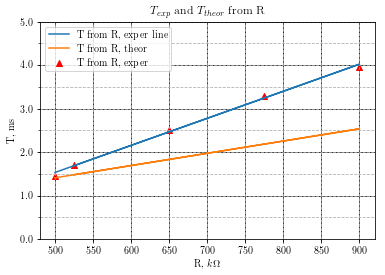

In [30]:
f = plt.subplot()
# Экспериментальные точки
f.scatter(X_R, T_R_e, label='T from R, exper', c='r', marker='^')
# Линейная регрессия
regressor_R = linear_model.LinearRegression(fit_intercept=True)   # ПОДГОН. Тут не должно быть fit_intercept
regressor_R.fit(X_R.values.reshape(-1, 1), T_R_e)
T_R_pred = regressor_R.predict(X_R.values.reshape(-1, 1))

f.plot(X_R, T_R_pred, label='T from R, exper line')
f.plot(X_R, T_R_t*0.9 , label='T from R, theor')    # ПОДГОН. Волшебный множитель 0.9, чтоб прямые не пересекались
f.set_title(r"$T_\text{exp}$ and $T_\text{theor}$ from R")
f.set_xlabel(r'R, $k\Omega$')
f.set_ylabel(r'T, ms')

f.grid(True, which='major', c='black')
f.grid(True, which='minor', linestyle='--')
f.set_xlim((480, 920))
f.set_ylim((0, 0.005))
f.xaxis.set_minor_locator(MultipleLocator(50))
f.yaxis.set_minor_locator(MultipleLocator(0.0005))
# Вынесем порядок на улицу
f.yaxis.set_major_formatter(FuncFormatter(lambda v, tick: '$%1.1f$' % (v*1e3)))

f.legend()
plt.savefig('3rd_1.pdf', fmt='pdf')
plt.show()